In [153]:
#Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

#Importing the data
data = pd.read_excel('online_retail_data.xlsx')

#Chcking first 5 rows of the data
data.head(5)

#Adding Columns
data['Year'] = [str(x).split('-')[0] for x in list(data['InvoiceDate'])]
data['Invoice_Type'] = [str(x)[0] for x in list(data['Invoice'])]
data['Cancelled'] = ['Y' if str(x)[0] == 'C' else 'N' for x in list(data['Invoice'])]

In [154]:
#Year and the country as filters - we can add more to this depending on the visuals
#number of invoices per year and maybe a growth rate ?
#number of customers per year and again a growth rate
#revenue per year and growth rate

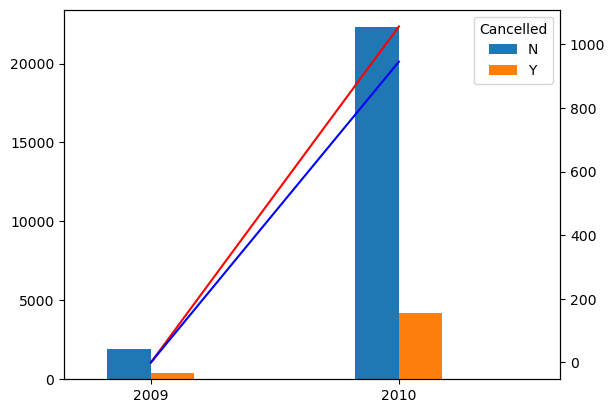

In [155]:
#Invoices per year
test = data.groupby(['Year','Cancelled'])['Invoice'].nunique().reset_index().pivot(index='Year', columns='Cancelled', values='Invoice').fillna(0).reset_index()

#Adding Percentage Changes
test['N_rate'] = [0] + [round(abs(list(test.N)[x] - list(test.N)[x+1])/list(test.N)[x]*100,2) for x in range(len(list(test.N))-1)]
test['Y_rate'] = [0] + [round(abs(list(test.Y)[x] - list(test.Y)[x+1])/list(test.Y)[x]*100,2) for x in range(len(list(test.Y))-1)]

#Plotting the graph
width = .35 # width of a bar
test[['N','Y']].plot(kind='bar', width = width)
test['N_rate'].plot(secondary_y=True,color='red')
test['Y_rate'].plot(secondary_y=True,color='blue')

ax = plt.gca()
plt.xlim([-width, len(test)-width])
ax.set_xticklabels(set(test['Year']))

plt.show()